## Learning Linear Regression ##
In this notebook I am going to try to understand what goes on behind the scenes of linear regression using numpy and pandas <br>
I am going to load in the Boston Housing dataset and go from there

In [58]:
# import numpy and pandas
# also import warnings and ignore them to keep notebook clean
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # ignores warnings

In [59]:
# loading in the dataset and peeking at the first five rows
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
# Taking some time here to play with some Pandas methods
#data.index # shows range of indices
#data.to_numpy() # returns df as a matrix
#data.describe() # some summary statistics. Notice the counts are all equal so there are no missing values--clean
#data.info() # gives us some more information and count and datatypes
#data.T # switches columns with rows
#data.sort_index(axis=1, ascending = False)# sorts the dataset by the index of each row
#data["tax"] # returns a single column (series)
#data[0:3] # row slicing
#data["tax"][3] # locate a specific value in column. Also can be done with data['tax'].loc[3]
#data.loc[:, ["tax","nox"]] # returns all the rows of two features
#data.isnull().sum() the first checks for missing values, the second sums them up

In [85]:
# Create empty list for coefficients
coefficients = []

In [86]:
# Creating helper functions to make model more viewable
def reshape_X(X):
    return X.reshape(-1,1) # numpy.reshape returns the m x n matrix of the arguments in this case

In [87]:
# The second helper matrix concatenates a feature of ones to the matrix
def concatenate_ones(X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1) # np.ones() creates an array of ones
    return np.concatenate((ones, X), 1) # concatenate basically appends the newly created vector of ones

In [92]:
# creating our function to fit the training data
def fit(X,y):
    global coefficients
    if len(X.shape) == 1:
        X = reshape_X(X)
    X = concatenate_ones(X)
    coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y) # math to obtain coeff ie. slope
    print(coefficients)

In [93]:
# creating a predict function to predict coefficient(??)
def predict(entry):
    b0 = coefficients[0] #initial slope
    other_betas = coefficients[1:] 
    prediction = b0 # initial prediction
    
    for xi, bi in zip(entry, other_betas): 
        # we avoid declaring two for loops by assigning xi to entry and bi to coef.
        # zip function creates a tuple out of the entry and other_betas
        prediction += (bi * xi)
    return prediction
        

### Training ###
To train the model, we will fit the dataset without the median value feature (because that is what we are trying to predict) and test how accurate it is in predicting the target

In [94]:
X = data.drop("medv", axis=1).values # drops the medv column from the data
y = data["medv"].values # setting our target equal to the values we just dropped

First I am going to run OLS (ordinary least squares regression) on the model, then do a train-test split

In [96]:
fit(X,y) # fits our dataset with the model

[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


In [97]:
predict(X[0])

30.003843377012902

So my prediction for the first median value is 30. Let's see for the whole dataset!

In [98]:
predictions = []
for row in X:
    predictions.append(predict(row))

In [104]:
results = pd.DataFrame({
    "Actual": y,
    "Predicted": predictions
})

Let's try using scikit for linear regression

In [126]:
# importing matplotlib for graphs 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [141]:
linear_regressor = LinearRegression()
linear_regressor.fit(X,y)
Y_pred = linear_regressor.predict(X)

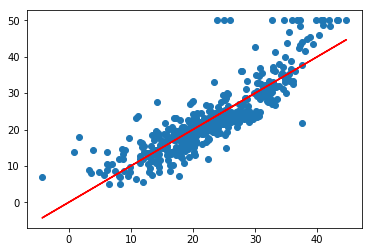

In [140]:
plt.scatter(predictions, y)
plt.plot(predictions, Y_pred, color='red')
plt.show()

Some things to figure out: how to properly format pyplot, other ML models I can use, figuring out train-test split

### References ###
Inspiration for this primarily comes from: https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014 <br>
***Additional Resources*** <br>
https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d <br>
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html <br>
https://docs.scipy.org/doc/numpy/ <br>
https://www.markdownguide.org/basic-syntax